** What is the evaluation metric ? **

* What is mean absolute error ? 
* How does it penalize the incorrect values ?

In [26]:
%matplotlib inline

import numpy as np
import pandas as pd
import os,sys
import bisect
import random

from collections import Counter, Sequence

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

basepath = os.path.expanduser('~/Desktop/src/AllState_Claims_Severity/')
sys.path.append(os.path.join(basepath, 'src'))

np.random.seed(2016)

from data import *

In [2]:
train, test, sample_sub = load_data()

In [5]:
# target variable
y = train.loss

### Wikipedia Definition

* Mean absolute error (MAE) is a quantity used to measure how close forecasts or predictions are to the eventual outcomes.

* the mean absolute error is an average of the absolute errors $${\displaystyle |e_{i}|=|f_{i}-y_{i}|}$$

In [10]:
# lets generate some random predictions and see their mean absolute error

class RandomPredictions(object):
    def __init__(self, seed, length, max_, min_):
        self.seed   = np.random.seed(seed)
        self.length = length
        self.max_   = max_
        self.min_   = min_
        
    def generate_predictions(self):
        return [np.random.uniform(self.max_, self.min_) for i in range(self.length)]

In [11]:
rp1 = RandomPredictions(2016, len(y), y.max(), y.min())
rp2 = RandomPredictions(2015, len(y), y.max(), y.min())

In [12]:
preds1 = rp1.generate_predictions()
preds2 = rp2.generate_predictions()

In [14]:
err1   = mean_absolute_error(y, preds1)
err2   = mean_absolute_error(y, preds2)

In [15]:
print('Mean absolute error for case 1: ', err1)
print('Mean absolute error for case 2: ', err2)

Mean absolute error for case 1:  57500.8218618
Mean absolute error for case 2:  57583.2029913


In [19]:
# lets plot to see how the random predictions perform in general
def analyze_random_predictions():
    seeds = np.arange(2000, 2020)
    errs  = []
    
    for seed in seeds:
        rp    = RandomPredictions(seed, len(y), y.max(), y.min())
        preds = rp.generate_predictions()
        err   = mean_absolute_error(y, preds)
        
        errs.append(err)
    
    plt.scatter(np.arange(len(seeds)), errs)
    plt.xlabel('Number of trials')
    plt.ylabel('MAE of uniform random predictions');

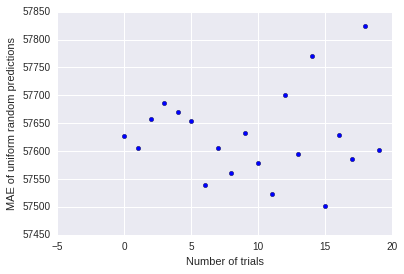

In [20]:
analyze_random_predictions()

** Let' try to add some intelliegence and instead of just choosing uniformly among all the possible values, choose via a weighted scheme. **

In [46]:
# lets generate some random predictions and see their mean absolute error

class WeightedPredictions(object):
    def __init__(self, seed, loss):
        self.seed   = np.random.seed(seed)
        self.loss   = loss
        
    def generate_predictions(self):
        return [np.random.choice(self.loss) for i in range(len(self.loss))]

In [49]:
# lets plot to see how the random predictions perform in general

def analyze_weighted_predictions():
    seeds = np.arange(2000, 2020)
    errs  = []
    
    for seed in seeds:
        rp    = WeightedPredictions(seed, y)
        preds = rp.generate_predictions()
        err   = mean_absolute_error(y, preds)
        
        errs.append(err)
    
    plt.scatter(np.arange(len(seeds)), errs)
    plt.xlabel('Number of trials')
    plt.ylabel('MAE of weighted predictions');

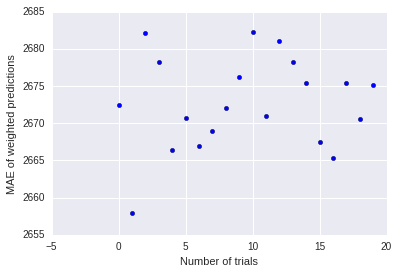

In [50]:
analyze_weighted_predictions();

** We can improve upon our guess by just using the 